# Tabular Data Workshop - Unidata 2023

We will be exploring a dataset using the package pandas. Pandas is a common package in the python ecosystem to explore, use, subset, and explore tabular (or excel) type datasets. We will also be covering a bit of [matplotlib](https://matplotlib.org/stable/gallery/index.html).

By Thomas Martin, Unidata, tmartin@ucar.edu

## When to use Pandas?

Pandas is a tool for tabular or point data (CSV's, excel, Parquet). If you have gridded datasets (X,Y,Z, t, commonly found as netCDF or GRIB) [Xarray](https://docs.xarray.dev/en/stable/) is the preferred tool. 

### Alternatives to Pandas with larger datasets

- [Modin](https://github.com/modin-project/modin)
- [Dask](https://github.com/dask/dask)
- [Polars](https://www.pola.rs/)

And a few more!

# Python!

Imports, this is a low-level talk, so nothing too exoctic.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

[Paper](https://essd.copernicus.org/articles/13/3013/2021/) where the dataset is from, licensed under CC:BY 4.0. Pandas is great, as you can feed it a url directly. 

In [2]:
filename = 'http://hdl.handle.net/11304/89dd440e-4e10-496e-b476-1ccf0ebeb4f3'

In [3]:
df = pd.read_csv(filename)
print('dataframe shape:', df.shape)
df

dataframe shape: (5577, 53)


,id,country,htap_region,climatic_zone,lon,lat,alt,relative_alt,type,type_of_area,...,o3_perc90,o3_perc98,o3_dma8eu,o3_avgdma8epax,o3_drmdmax1h,o3_w90,o3_aot40,o3_nvgt070,o3_nvgt100,dataset
0,3336,Germany,EUR,cool_moist,8.308210,54.924970,12.0,3,background,rural,...,46.4399,54.8468,53.5738,38.8078,50.7704,86.1266,10197.4742,2.0,0.0,test
1,3338,Germany,EUR,cool_moist,12.725280,54.436670,1.0,1,background,rural,...,44.0575,53.7778,51.3996,35.8313,48.3935,69.0987,7573.2222,1.0,0.0,train
2,3339,Germany,EUR,cool_moist,6.093923,50.754704,205.0,66,background,urban,...,41.1803,58.4009,54.9030,32.6169,49.8276,154.1263,8655.4730,5.4,1.0,train
3,3340,Germany,EUR,cool_moist,8.548389,52.023169,102.0,29,background,urban,...,38.1730,53.5109,50.1112,28.6179,46.2694,120.2575,6036.5851,2.6,0.0,test
4,3341,Germany,EUR,cool_moist,6.874554,51.862000,45.0,8,background,rural,...,40.6623,58.4082,53.9564,31.0051,50.6809,203.4584,9045.4745,6.8,1.2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572,17685,Germany,EUR,cool_moist,11.027920,49.322730,344.0,37,background,urban,...,42.4290,59.3735,56.0336,31.0232,51.5903,123.8122,10775.6201,3.5,0.0,train
5573,17718,Germany,EUR,cool_dry,11.850274,52.602056,35.0,5,background,urban,...,44.7611,58.4130,55.1136,34.8838,49.9512,146.6134,11145.3874,5.0,0.0,train
5574,17719,Germany,EUR,cool_dry,11.091078,51.456071,143.0,13,background,rural,...,43.4429,56.3841,54.4162,34.0865,49.3407,116.7581,9746.6681,2.5,0.0,val
5575,17720,Germany,EUR,cool_moist,13.420573,48.947611,858.0,76,background,rural,...,52.7680,63.9991,60.3341,41.3771,54.8419,108.2840,18120.8647,4.5,0.0,train


In [4]:
print('size of dataframe in GB:', np.round(df.memory_usage(index=True).sum()*1e-9,4))

size of dataframe in GB: 0.0024


While pandas is not the most memory efficient tool, can easily handle 100,000+ row datasets. Would look for alternatives once you hit a few GB's, and you need to have an alternative once you are out of memory.

In [5]:
df.columns

Index(['id', 'country', 'htap_region', 'climatic_zone', 'lon', 'lat', 'alt',
       'relative_alt', 'type', 'type_of_area', 'water_25km',
       'evergreen_needleleaf_forest_25km', 'evergreen_broadleaf_forest_25km',
       'deciduous_needleleaf_forest_25km', 'deciduous_broadleaf_forest_25km',
       'mixed_forest_25km', 'closed_shrublands_25km', 'open_shrublands_25km',
       'woody_savannas_25km', 'savannas_25km', 'grasslands_25km',
       'permanent_wetlands_25km', 'croplands_25km', 'urban_and_built-up_25km',
       'cropland-natural_vegetation_mosaic_25km', 'snow_and_ice_25km',
       'barren_or_sparsely_vegetated_25km', 'wheat_production',
       'rice_production', 'nox_emissions', 'no2_column', 'population_density',
       'max_population_density_5km', 'max_population_density_25km',
       'nightlight_1km', 'nightlight_5km', 'max_nightlight_25km',
       'o3_average_values', 'o3_daytime_avg', 'o3_nighttime_avg', 'o3_median',
       'o3_perc25', 'o3_perc75', 'o3_perc90', 'o3_perc98

In [6]:
df.dtypes

id                                           int64
country                                     object
htap_region                                 object
climatic_zone                               object
lon                                        float64
lat                                        float64
alt                                        float64
relative_alt                                 int64
type                                        object
type_of_area                                object
water_25km                                 float64
evergreen_needleleaf_forest_25km           float64
evergreen_broadleaf_forest_25km            float64
deciduous_needleleaf_forest_25km           float64
deciduous_broadleaf_forest_25km            float64
mixed_forest_25km                          float64
closed_shrublands_25km                     float64
open_shrublands_25km                       float64
woody_savannas_25km                        float64
savannas_25km                  

Can get more information on different data types (dtypes) [here](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes). Let's drop some of these columns!

In [7]:
df = df.drop(['o3_dma8eu','o3_avgdma8epax','o3_drmdmax1h','o3_w90','o3_aot40', 'o3_nvgt070', 'o3_nvgt100'], axis =1)

In [8]:
df.describe()

,id,lon,lat,alt,relative_alt,water_25km,evergreen_needleleaf_forest_25km,evergreen_broadleaf_forest_25km,deciduous_needleleaf_forest_25km,deciduous_broadleaf_forest_25km,...,nightlight_5km,max_nightlight_25km,o3_average_values,o3_daytime_avg,o3_nighttime_avg,o3_median,o3_perc25,o3_perc75,o3_perc90,o3_perc98
count,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,...,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000
mean,11481.604447,13.477650,39.302449,264.636320,49.784113,12.667886,2.884884,0.511655,0.002241,2.676529,...,39.774192,59.899767,27.881232,-170.295158,-177.114972,-181.294683,-189.849413,-172.774709,-164.798120,-153.907786
std,4041.144957,88.079720,13.233924,466.298427,107.169033,19.386709,9.199527,4.170122,0.080375,9.027644,...,20.702336,8.833273,6.402689,410.383033,404.478593,412.277939,407.978619,416.565376,420.595277,426.124266
min,3336.000000,-170.564000,-89.996000,-4.000000,-136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.621200,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8252.000000,-76.003333,35.411100,20.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.010000,62.000000,23.749900,23.771700,13.231700,16.250000,5.012400,27.568200,36.089300,45.487500
50%,11732.000000,7.478586,39.834461,90.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.130000,63.000000,27.446600,31.037900,19.001000,24.390300,12.493400,35.364900,45.362200,58.356100
75%,15431.000000,127.115140,45.836945,287.000000,47.000000,23.400000,1.600000,0.000000,0.000000,0.000000,...,59.320000,63.000000,31.429300,35.707600,24.040800,29.250000,18.646100,40.000000,50.750000,65.120000
max,17722.000000,174.870000,82.450830,5500.000000,1826.000000,100.000000,96.400000,99.500000,4.800000,94.500000,...,63.000000,63.000000,65.589900,56.131900,54.741900,54.666700,48.000000,61.640000,74.872000,115.286000


### loc, iloc, groupby

Use loc with labels, iloc with integers.

In [9]:
df.loc[df['climatic_zone'] == 'cool_dry']

,id,country,htap_region,climatic_zone,lon,lat,alt,relative_alt,type,type_of_area,...,max_nightlight_25km,o3_average_values,o3_daytime_avg,o3_nighttime_avg,o3_median,o3_perc25,o3_perc75,o3_perc90,o3_perc98,dataset
83,3421,Germany,EUR,cool_dry,10.232076,50.048397,231.0,22,background,urban,...,60,19.1268,23.9816,14.1907,16.9294,6.4449,28.4895,39.8538,55.2008,train
89,3427,Germany,EUR,cool_dry,9.956420,49.804695,226.0,28,background,suburban,...,60,19.6385,25.1792,13.9766,17.8283,6.4067,29.3445,40.5119,56.7480,train
92,3432,Germany,EUR,cool_dry,12.809481,52.931890,43.0,3,background,suburban,...,44,25.1825,29.7116,20.6480,24.3843,14.9274,33.9901,43.5274,57.4574,val
93,3433,Germany,EUR,cool_dry,14.057064,51.897598,52.0,5,background,rural,...,60,26.4202,32.1636,20.5568,25.3683,15.9467,35.5690,45.4863,59.1321,train
103,3443,Germany,EUR,cool_dry,8.664619,49.872303,158.0,53,background,urban,...,63,20.4220,25.6659,15.1255,18.7183,6.9884,30.0406,41.6029,59.6880,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,17633,China,EAS,cool_dry,100.900000,36.280000,3810.0,639,background,remote,...,54,52.8663,52.7926,52.9295,50.8000,45.7600,59.4650,66.4400,74.3440,val
5552,17635,China,EAS,cool_dry,87.930000,47.100000,562.0,47,background,remote,...,25,33.5254,36.0617,27.1773,31.8333,23.6250,39.5333,45.9667,52.4333,val
5554,17637,United States of America,NAM,cool_dry,-105.003700,40.050000,1581.0,55,traffic,urban,...,63,34.3409,41.2765,27.9816,34.3000,23.6888,44.6994,55.1278,67.6040,train
5573,17718,Germany,EUR,cool_dry,11.850274,52.602056,35.0,5,background,urban,...,52,26.3113,30.8811,21.7917,25.6509,16.3700,35.3110,44.7611,58.4130,train


In [10]:
df.iloc[0:4] # rows only

,id,country,htap_region,climatic_zone,lon,lat,alt,relative_alt,type,type_of_area,...,max_nightlight_25km,o3_average_values,o3_daytime_avg,o3_nighttime_avg,o3_median,o3_perc25,o3_perc75,o3_perc90,o3_perc98,dataset
0,3336,Germany,EUR,cool_moist,8.308210,54.924970,12.0,3,background,rural,...,56,33.4050,34.7121,32.1032,35.3825,25.9166,41.2871,46.4399,54.8468,test
1,3338,Germany,EUR,cool_moist,12.725280,54.436670,1.0,1,background,rural,...,60,29.8555,32.2933,27.3245,30.2799,21.9242,37.6381,44.0575,53.7778,train
2,3339,Germany,EUR,cool_moist,6.093923,50.754704,205.0,66,background,urban,...,62,23.8597,28.0062,19.3949,23.8515,13.9652,32.0123,41.1803,58.4009,train
3,3340,Germany,EUR,cool_moist,8.548389,52.023169,102.0,29,background,urban,...,62,20.3253,23.9555,16.3471,19.8611,8.9930,29.0232,38.1730,53.5109,test


In [11]:
df.iloc[0:4, 20:25] # rows and columns

,grasslands_25km,permanent_wetlands_25km,croplands_25km,urban_and_built-up_25km,cropland-natural_vegetation_mosaic_25km
0,4.8,1.8,4.6,0.0,1.1
1,2.2,2.3,20.5,0.0,8.3
2,3.5,0.0,15.9,16.5,29.2
3,0.0,0.0,38.6,16.4,32.5


### groupby

If you are familiar with sql, groupby might feel familiar to you. Documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In [12]:
df.groupby(by=['climatic_zone']).median()

,id,lon,lat,alt,relative_alt,water_25km,evergreen_needleleaf_forest_25km,evergreen_broadleaf_forest_25km,deciduous_needleleaf_forest_25km,deciduous_broadleaf_forest_25km,...,nightlight_5km,max_nightlight_25km,o3_average_values,o3_daytime_avg,o3_nighttime_avg,o3_median,o3_perc25,o3_perc75,o3_perc90,o3_perc98
climatic_zone,,,,,,,,,,,,,,,,,,,,,
boreal_dry,14953.0,-116.008610,60.719720,240.00,13.0,1.00,15.6,0.0,1.0,0.0,...,37.270,63.0,24.62720,24.61540,15.09860,21.75000,15.25000,29.75000,38.00000,46.25000
boreal_moist,11430.0,-97.873530,53.311110,475.00,74.0,2.20,37.3,0.0,0.0,0.0,...,1.730,51.0,32.48510,32.93210,28.35140,31.57810,25.20000,38.09430,43.50000,50.00000
cool_dry,10715.5,8.403429,48.086109,343.50,28.0,0.00,0.0,0.0,0.0,0.0,...,29.760,62.0,26.71825,30.29200,19.63145,24.33545,13.81155,34.56085,44.09945,57.62395
cool_moist,9910.5,6.147500,47.609014,231.00,28.0,0.00,1.1,0.0,0.0,0.0,...,28.795,62.0,26.47325,28.47145,18.95355,23.04950,13.00000,33.22570,42.05615,54.84015
polar_dry,4573.0,-97.534000,71.951750,1647.00,4.0,34.15,0.0,0.0,0.0,0.0,...,11.220,31.0,36.81615,36.82320,36.81850,37.59700,31.69500,42.40250,46.27600,51.33860
polar_moist,6066.0,7.293660,46.238750,3293.00,606.0,1.70,6.4,0.0,0.0,0.0,...,0.515,38.0,46.09470,39.05355,39.37025,39.43260,33.67080,44.92235,49.87335,60.14880
tropical_dry,10977.5,-97.338284,32.812885,114.50,26.0,0.00,0.0,0.0,0.0,0.0,...,52.285,63.0,31.08975,37.48565,22.41540,29.67010,18.41030,40.53755,49.84670,61.57290
tropical_moist,11851.5,-82.594722,29.603329,7.65,5.0,9.80,0.0,0.0,0.0,0.0,...,52.820,63.0,25.95995,33.29440,16.79580,24.20000,13.40000,35.40000,45.80000,59.00000
tropical_montane,10972.0,-110.774357,32.047670,937.00,46.0,0.00,0.0,0.0,0.0,0.0,...,17.760,63.0,34.36260,42.88290,25.92820,35.20000,23.60000,44.80000,53.20000,63.20000


In [13]:
df.groupby(['country', 'type_of_area']).median()

id         lon        lat     alt  \
country                  type_of_area                                           
Algeria                  remote         4599.0    5.630000  23.270000  2710.0   
American Samoa           unknown        4633.0 -170.564000 -14.247000    42.0   
Antarctica               remote         4600.5   95.738500 -83.920500  1512.5   
Argentina                remote         4603.5  -64.741670 -43.257535   268.0   
                         unknown       15122.0  -34.616700 -77.866700   256.0   
...                                        ...         ...        ...     ...   
United States of America remote         4590.0 -105.600000  40.050000  1483.0   
                         rural         13599.5  -86.813938  39.096297   376.5   
                         suburban      11128.5 -123.546500  40.892550   360.0   
                         unknown       12045.0  -90.410556  38.459340   195.0   
                         urban         15652.5  -97.584950  36.190185   790.5   

                                       relative_alt  water_25km  \
country                  type_of_area                             
Algeria                  remote               418.0        0.00   
American Samoa           unknown               17.0       94.50   
Antarctica               remote                42.0       44.10   
Argentina                remote                14.5       12.55   
                         unknown                5.0       28.50   
...                                             ...         ...   
United States of America remote               397.0        0.00   
                         rural                 49.0        0.00   
                         suburban              22.0       24.30   
                         unknown               20.0        0.00   
                         urban                 37.0        1.45   

                                       evergreen_needleleaf_forest_25km  \
country                  type_of_area                                     
Algeria                  remote                                    0.00   
American Samoa           unknown                                   0.00   
Antarctica               remote                                    0.00   
Argentina                remote                                    0.00   
                         unknown                                   0.00   
...                                                                 ...   
United States of America remote                                    0.00   
                         rural                                     0.00   
                         suburban                                 60.25   
                         unknown                                   0.00   
                         urban                                     0.00   

                                       evergreen_broadleaf_forest_25km  \
country                  type_of_area                                    
Algeria                  remote                                    0.0   
American Samoa           unknown                                   2.8   
Antarctica               remote                                    0.0   
Argentina                remote                                    0.0   
                         unknown                                   0.0   
...                                                                ...   
United States of America remote                                    0.0   
                         rural                                     0.0   
                         suburban                                  0.0   
                         unknown                                   0.0   
                         urban                                     0.0   

                                       deciduous_needleleaf_forest_25km  \
country                  type_of_area                                     
Algeria                  remo

### nan hunting

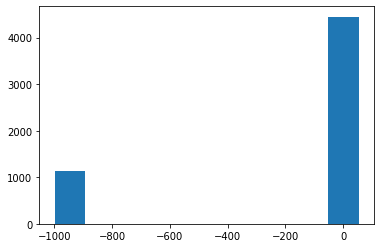

In [14]:
plt.hist(df.o3_median);

From the .describe() and the plot above, let's filter out the rows with the -999.0's!

In [15]:
df = df[df['o3_median'] != -999.0]

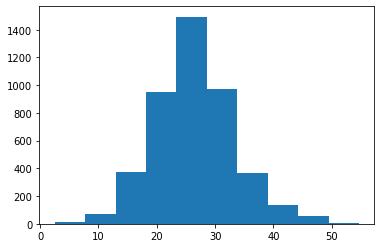

In [16]:
plt.hist(df.o3_median);

Let's compare rural vs urban median ozone

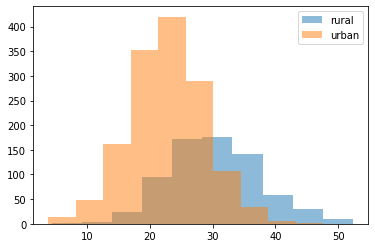

In [17]:
plt.hist(df.o3_median[df.type_of_area == 'rural'], alpha = 0.5, label = 'rural');
plt.hist(df.o3_median[df.type_of_area == 'urban'], alpha = 0.5, label = 'urban');

plt.legend()

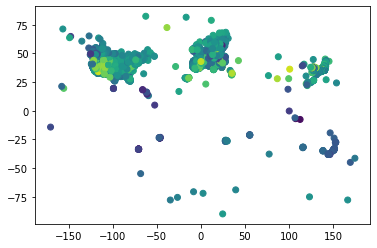

In [18]:
plt.scatter(df.lon,
            df.lat,
            c=df.o3_median)

### Unique country values

In [19]:
df.country.unique()

array(['Germany', 'Latvia', 'Canada', 'Italy', 'Sweden', 'Spain',
       'United States of America', 'Japan', 'Switzerland', 'New Zealand',
       'Greenland', 'Barbados', 'Nepal', 'Slovenia', 'Austria', 'Bermuda',
       'Hungary', 'Antarctica', 'Argentina', 'Algeria', 'Malta',
       'Netherlands', 'Cape Verde', 'American Samoa', 'France',
       'Czech Republic', 'Indonesia', 'Thailand',
       'Bosnia and Herzegovina', 'Belgium', 'Bulgaria', 'Cyprus',
       'Denmark', 'Estonia', 'Finland', 'French Guiana', 'Réunion',
       'Martinique', 'Guadeloupe', 'United Kingdom', 'Gibraltar',
       'Greece', 'Croatia', 'Ireland', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovakia', 'Mexico', 'Australia',
       'South Africa', 'India', 'Chile', 'Israel', 'Brazil',
       'Republic of Korea', 'Russia', 'China', 'Taiwan'], dtype=object)

In [20]:
df.country.nunique()

65

In [21]:
df.country.value_counts()

Japan                       828
United States of America    815
Spain                       429
France                      371
Italy                       325
                           ... 
Nepal                         1
Barbados                      1
Greenland                     1
Russia                        1
Cape Verde                    1
Name: country, Length: 65, dtype: int64

In [22]:
df_usa = df[df.country == 'United States of America']
df_usa.country.value_counts()

United States of America    815
Name: country, dtype: int64

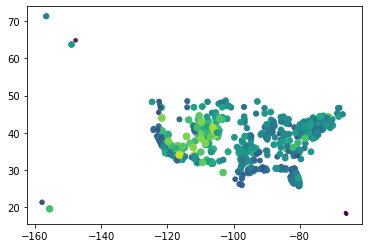

In [23]:
plt.scatter(df_usa.lon,
            df_usa.lat,
            c=df_usa.o3_median,
            s=df_usa.o3_median)

(-140.0, -60.0)

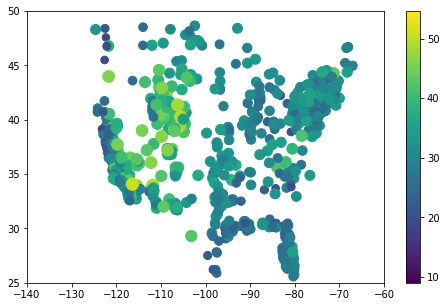

In [24]:
plt.figure(figsize=(8,5))

plt.scatter(df_usa.lon,
            df_usa.lat,
            c=df_usa.o3_median,
            s=df_usa.o3_median*3)

plt.colorbar()

plt.ylim([25,50])
plt.xlim([-140,-60])

One way to fix this plot up is to use [cartopy](https://github.com/SciTools/cartopy).

# Future Work

[Google Colab's 10 Minute Pandas](https://medium.com/google-colab/10-minutes-to-pandas-now-in-colab-a7a629a630dc)

[Project Pythia Pandas](https://foundations.projectpythia.org/core/pandas.html)

[Kaggle Pandas Tutorials](https://www.kaggle.com/learn/pandas)

[Effective Pandas (book)](https://store.metasnake.com/effective-pandas-book)